# 키워드 분석

- 핵심어(keyword)란 텍스트 자료의 중요한 내용을 압축적으로 제시하는 단어 또는 문구
- 핵심어 분석이란 불용어 제거와 어간추출 및 형태소 분석 등의 자연어 처리를 시행한 후 텍스트에서 많이 등장하는 형태소의 등장 빈도를 분석함으로써 핵심어를 추출
- 특정 텍스트 자료에 많이 나타나는 형태소가 그 텍스트 주제를 표출할 가능성이 높다는 가정에 기초
- 물론 빈도 분석에서 영어의 전치사나 한국어의 조사와 같이 의미를 별로 담고 있지 않은 불용어는 제외하는 것이 좋음
- 키워드 분석은 텍스트의 주제 추정, 텍스트 유사도, 검색 엔진의 검색 결과 우선 순위 측정 등 다양하게 사용될 수 있음

## 한글 폰트 설정

## 네이버 영화 리뷰 데이터

- 키워드 분석에는 네이버 영화 리뷰 데이터를 사용

In [78]:
import urllib.request

raw = urllib.request.urlopen("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt").readlines()

In [79]:
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

- 데이터를 확인해보면 모두 바이트로 이루어져 있으며, 리뷰 외의 다른 데이터도 존재
- 데이터를 문자열로 변환하고 리뷰만 추출

In [80]:
raw = [x.decode() for x in raw[1:]]

reviews = []
for i in raw :
    reviews.append(i.split('\t')[1])

print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


## 형태소 분석을 이용한 명사 추출

In [81]:
from konlpy.tag import Komoran

In [82]:
komoran = Komoran()

In [83]:
nouns = []
for review in reviews :
    for noun in komoran.nouns(review) :
        nouns.append(noun)
        
nouns[:10]

['때', '디자인', '학생', '외국', '디자이너', '전통', '발전', '문화', '산업', '사실']

### 불용어(Stopwords) 사전 만들기
- 형태소 분석을 통해 조사 접속사 등의 제거 가능
- 하지만 한국어는 명사에서도 상당히 많은 불필요한 단어들이 포함
- 사용자가 직접 불용어 사전을 유지하면서 불필요한 단어 제거 필요
- 빈도가 너무 커서 분석에 방해되는 단어도 제거 필요 (예 : 영화)

In [84]:
stop_words = "영화 전 난 일 걸 뭐 줄 만 건 분 개 꿀 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것"
stop_words = stop_words.split(' ')
print(stop_words)

['영화', '전', '난', '일', '걸', '뭐', '줄', '만', '건', '분', '개', '꿀', '잼', '이거', '번', '중', '듯', '때', '게', '내', '말', '나', '수', '거', '점', '것']


### 불용어를 제외하여 형태소 분석 수행
- 한글 텍스트에 대해서 형태소 분석 수행
- 분석으로 추출하는 명사 중에서 불용어에 포함되지 않은 텍스트만 추출하여 저장

In [85]:
nouns = []
for review in reviews :
    for noun in komoran.nouns(review) :
        if noun not in stop_words :
            nouns.append(noun)
            
nouns[:10]

['디자인', '학생', '외국', '디자이너', '전통', '발전', '문화', '산업', '사실', '우리나라']

## 단어 빈도수 측정

- 단어 빈도수 측정에는 `collections` 라이브러리의 `Counter` 함수를 이용
- `collections` 라이브러리는 내장 라이브러리로 별도 설치가 필요없음
- `counter`를 이용하면 각 단어의 빈도 수를 딕셔너리로 편리하게 생성 가능

In [86]:
from collections import Counter
nouns_counter = Counter(nouns)
# 제일 빈도가 높은 50개 가져와라

In [87]:
# 정수 인코딩
word2inx = {}
Bow = []
for word in nouns :
    if word not in word2inx.keys() :
        word2inx[word] = len(word2inx)
        Bow.insert(len(word2inx)-1,1)
    else :
        inx = word2inx.get(word)
        Bow[inx] += 1
print(word2inx)
print(Bow)

{'디자인': 0, '학생': 1, '외국': 2, '디자이너': 3, '전통': 4, '발전': 5, '문화': 6, '산업': 7, '사실': 8, '우리나라': 9, '시절': 10, '끝': 11, '열정': 12, '노라': 13, '노': 14, '사람': 15, '꿈': 16, '감사': 17, '폴리스': 18, '스토리': 19, '시리즈': 20, '뉴': 21, '최고': 22, '연기': 23, '라고': 24, '생각': 25, '몰입': 26, '영': 27, '화지': 28, '안개': 29, '밤하늘': 30, '초승달': 31, '사랑': 32, '처음': 33, '완전': 34, '감동': 35, '개들의 전쟁': 36, '빠': 37, '굿': 38, '바보': 39, '병': 40, '인': 41, '나이': 42, '하지': 43, '훗날': 44, '다시': 45, '보면': 46, '대사': 47, '하나하나': 48, '감정': 49, '을': 50, '완벽': 51, '이해': 52, '고질라': 53, '무': 54, '오페라': 55, '작품': 56, '극단': 57, '평': 58, '반전': 59, '제': 60, '평점': 61, '긴장감': 62, '스릴': 63, '감': 64, '전장': 65, '공포': 66, '고시': 67, '에이': 68, '터': 69, '소재': 70, '뿐': 71, '관련': 72, '밀회': 73, '화이팅': 74, '!!': 75, '상당': 76, '수작': 77, '일본': 78, '10년': 79, '마음': 80, '임팩트': 81, '일품': 82, '오랜만': 83, '범죄': 84, '스릴러': 85, '사랑해': 86, '마디': 87, '밤': 88, '잠': 89, '징': 90, '교복': 91, '남은': 92, '션': 93, '자이': 94, '볼펜': 95, '자국': 96, '형태': 97, '마지막': 98, '씨': 99, '강압'

In [88]:
# 제일 빈도가 높은 50개 가져와라
top_nouns = dict(nouns_counter.most_common(50))
top_nouns

{'연기': 9452,
 '평점': 8314,
 '최고': 8245,
 '생각': 7003,
 '스토리': 6948,
 '드라마': 6547,
 '사람': 6520,
 '감동': 6171,
 '!!': 6048,
 '배우': 5830,
 '내용': 5615,
 '감독': 5399,
 '안': 5381,
 '시간': 5041,
 '재미': 4885,
 '쓰레기': 4499,
 '작품': 3941,
 '사랑': 3716,
 '이': 3592,
 '마지막': 3529,
 '이건': 3478,
 '액션': 3386,
 '기대': 3348,
 '!!!': 3311,
 '장면': 3232,
 '완전': 3178,
 '처음': 3140,
 '정도': 3088,
 '편': 3019,
 '씨': 2940,
 '느낌': 2877,
 '이야기': 2873,
 '최악': 2774,
 '돈': 2772,
 '끝': 2747,
 '이해': 2599,
 '명작': 2587,
 '한국': 2486,
 '주인공': 2465,
 '여자': 2430,
 '연출': 2371,
 '이영화': 2335,
 '때문': 2309,
 '년': 2283,
 '기억': 2236,
 '진짜': 2232,
 '다': 2225,
 '한': 2162,
 '데': 2109,
 '마음': 2029}

## 단어 빈도 시각화

In [89]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt

In [90]:
plt.rcParams['font.family'] = 'Malgun Gothic'

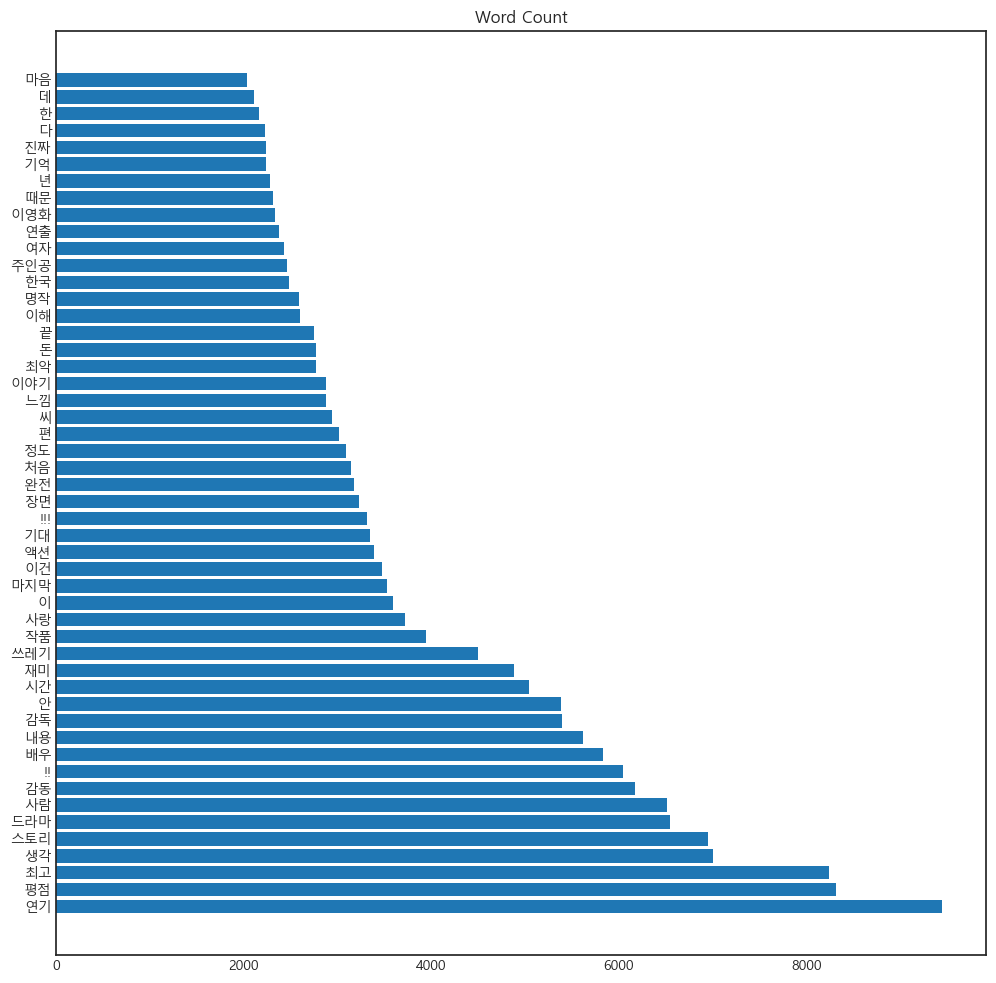

In [91]:
y_pos = np.arange(len(top_nouns))

figure = plt.figure(figsize = (12, 12))
plt.barh(y_pos, top_nouns.values())
plt.title("Word Count")
plt.yticks(y_pos, top_nouns.keys())
plt.show()

## 워드클라우드

* 텍스트에 담겨있는 여러 형태소들의 등장 빈도를 가장 직관적으로 시각화하는 방법
* 텍스트에 등장하는 단어를 그 등장 빈도에 따라 서로 크기가 다르게 구름 형태로 표현함으로써, 단어의 빈도 수를 한번에 알 수 있음  
* 최근에 많은 서비스들이 어떤 핵심어가 많이 등장했는가를 워드클라우드 형식으로 시각화
* 빈도 수만을 시각적으로 표현한 것이기 때문에, 단어들 사이의 연관성이나 의미 구조 등을 분석하는 데는 한계가 있음

* 파이썬에서 워드 클라우드를 시각화하기 위해 `matplotlib` 라이브러리와 `WordCloud` 라이브러리를 `import` 해서 사용
* `WordCloud` 라이브러리는 `pip install wordcloud` 명령어를 통해 설치 필요

In [92]:
from wordcloud import WordCloud

In [94]:
wc = WordCloud(background_color="white", font_path = "C:/Users/tmdwn/anaconda3/Lib/site-packages/matplotlib/mpl-data/fonts/NanumGothic.ttf")

In [95]:
wc.generate_from_frequencies(top_nouns)

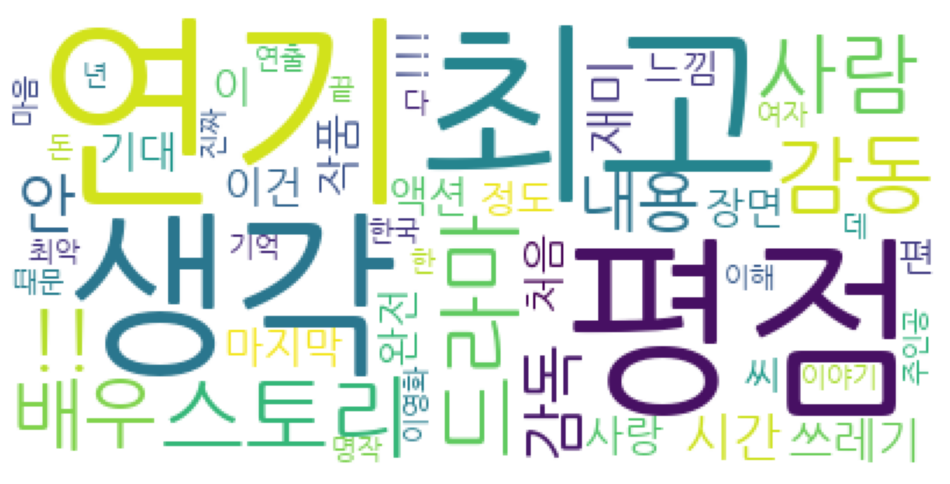

In [96]:
figure = plt.figure(figsize = (12, 12))
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(wc)
plt.show()

## squarify 트리맵 시각화

* `squarify`는 트리맵 생성을 지원해주는 파이썬 라이브러리
* `squarify` 라이브러리를 이용해 키워드와 키워드 빈도 수를 트리맵으로 나타냄   

In [97]:
import squarify
import matplotlib as mpl

In [98]:
norm = mpl.colors.Normalize(vmin = min(top_nouns.values()),
                            vmax = max(top_nouns.values()))

<AxesSubplot:>

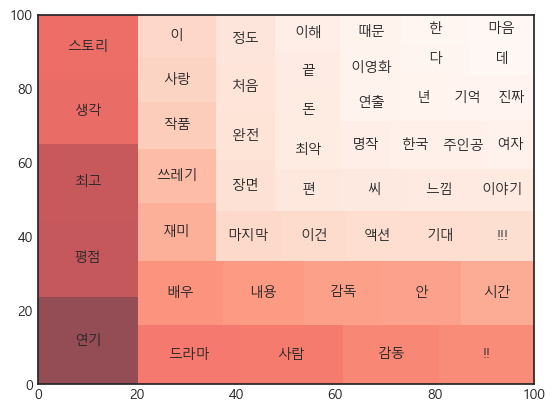

In [99]:
# top_nouns에서 각각의 단어들마다 나온 빈도에 다라 어떠한 색깔을 가질지 지정해준다.
colors = [mpl.cm.Reds(norm(value)) for value in top_nouns.values()]

squarify.plot(label = top_nouns.keys(),
              sizes = top_nouns.values(),
              color = colors,
              alpha = .7)

In [100]:
len(top_nouns)

50